## Receiver Operating CharacteristIc Curve (AUC/ROC)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

heart_disease = pd.read_csv("data/heart-disease.csv")

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
np.random.seed(44)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_Train, Y_Train)

RandomForestClassifier()

In [4]:
np.random.seed(44)

y_probs = clf.predict_proba(X_Test)
y_probs[:10]

array([[0.11, 0.89],
       [0.13, 0.87],
       [0.48, 0.52],
       [0.14, 0.86],
       [0.12, 0.88],
       [0.03, 0.97],
       [0.65, 0.35],
       [0.54, 0.46],
       [0.91, 0.09],
       [1.  , 0.  ]])

In [5]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.89, 0.87, 0.52, 0.86, 0.88, 0.97, 0.35, 0.46, 0.09, 0.  , 0.06,
       0.69, 0.04, 0.02, 1.  , 0.54, 0.99, 0.49, 0.09, 0.87, 0.99, 0.97,
       0.08, 0.08, 0.69, 0.62, 0.12, 0.99, 0.08, 0.93, 0.4 , 0.28, 0.82,
       0.32, 0.04, 0.07, 0.84, 0.66, 0.69, 0.92, 0.83, 0.94, 0.73, 0.02,
       0.97, 0.98, 0.71, 0.24, 0.89, 0.23, 0.87, 0.41, 0.1 , 0.09, 0.9 ,
       0.6 , 0.12, 0.98, 0.85, 0.19, 0.17])

In [7]:
fpr, tpr, thresholds = roc_curve(Y_Test, y_probs_positive)

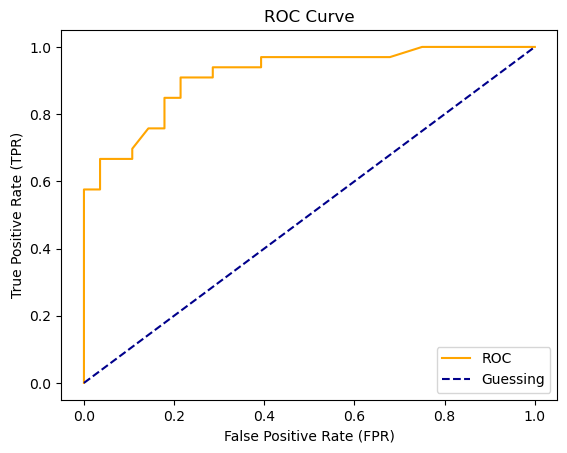

In [10]:
import matplotlib.pyplot as plt

def plot_roc_courve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
plot_roc_courve(fpr, tpr)

In [11]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_Test, y_probs_positive)

0.9145021645021645

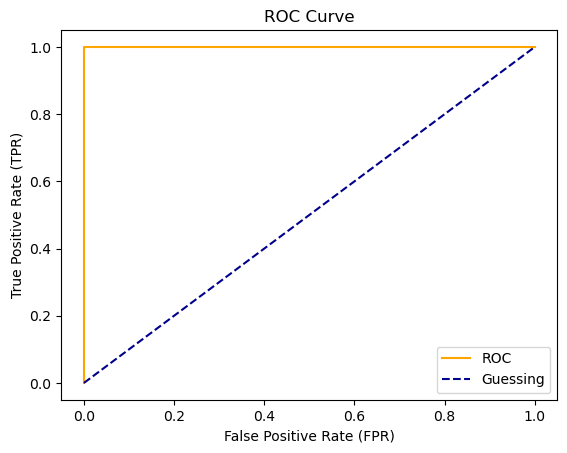

In [12]:
#Plot perfect ROC & AUC Curve
fpr, tpr, thresholds = roc_curve(Y_Test, Y_Test)
plot_roc_courve(fpr, tpr)

In [13]:
# Perfect AUC Score
roc_auc_score(Y_Test, Y_Test)

1.0